<a href="https://colab.research.google.com/github/dimLMT/Metabolic-Syndrome-Forecast/blob/main/part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
# Confirm the file was saved by loading it back in
loaded = joblib.load('/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/part1.joblib')
loaded.keys()

dict_keys(['X_train_tf', 'y_train', 'X_test_tf', 'y_test', 'model', 'permutation_importances', 'X', 'y'])

In [3]:
# Loading data and objects in a new notebook
X_train_tf = loaded['X_train_tf']
y_train = loaded['y_train']
X_test_tf = loaded['X_test_tf']
y_test = loaded['y_test']
y_train.head()

seqn
69151    No MetSyn
70567    No MetSyn
64333    No MetSyn
68115    No MetSyn
67719    No MetSyn
Name: MetabolicSyndrome, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Sklearn Display
from sklearn import set_config
set_config(transform_output='pandas')

# encode labels
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)
y_test_enc

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,

# Start building a small neural network

In [5]:
#keras imports
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import metrics

In [6]:
# Scale data
scaler = StandardScaler()
X_train_tf = scaler.fit_transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)
X_train_tf.head()

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,...,Marital_Missing,Marital_Separated,Marital_Single,Marital_Widowed,Race_Asian,Race_Black,Race_Hispanic,Race_MexAmerican,Race_Other,Race_White
seqn,,,,,,,,,,,,,,,,,,,,,
69151,0.479889,1.524161,-0.154930,-0.346375,-0.369369,-0.151810,-0.465579,0.215100,0.615647,-0.589530,...,-0.299313,-0.208514,-0.509531,-0.268452,-0.417335,-0.550821,-0.352558,-0.334361,-0.15644,1.266855
70567,1.789367,-0.898446,0.210650,-0.528455,1.988308,0.035267,0.783160,-0.426943,-0.824293,-0.047159,...,-0.299313,-0.208514,-0.509531,-0.268452,-0.417335,-0.550821,-0.352558,-0.334361,-0.15644,1.266855
64333,-0.146383,-0.736939,-0.741118,-0.331201,-0.369369,-0.158786,-1.159324,-0.175709,0.353840,0.517349,...,-0.299313,-0.208514,-0.509531,-0.268452,2.396158,-0.550821,-0.352558,-0.334361,-0.15644,-0.789357
68115,1.789367,-0.736939,-0.835665,-0.437415,-0.369369,-0.051190,1.199407,0.550078,0.092033,-0.091434,...,-0.299313,-0.208514,-0.509531,3.725055,-0.417335,-0.550821,-0.352558,-0.334361,-0.15644,1.266855
67719,-0.772656,1.265750,-0.993242,-0.604322,4.345986,2.238468,1.130032,-1.934347,1.008358,-0.157847,...,-0.299313,-0.208514,-0.509531,-0.268452,-0.417335,1.815473,-0.352558,-0.334361,-0.15644,-0.789357


In [7]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

In [8]:
keras.backend.clear_session()

def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =X_train_tf.shape[1],
                activation = 'relu'))
    model.add(Dense(10, activation = 'tanh'))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
                  metrics=[metrics.BinaryAccuracy(), metrics.Recall(), metrics.Precision()])
    return model

# Call our build function to build model
model1 = build_model()

# Get model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                250       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
early_stop = EarlyStopping(monitor='val_binary_accuracy', patience=5)
history = model1.fit(X_train_tf, y_train_enc,
                        validation_split = 0.2,
                        epochs=50,
                        callbacks = [early_stop])

Epoch 1/50
45/45 [==============================] - 3s 22ms/step - loss: 0.6214 - binary_accuracy: 0.6451 - recall: 0.7710 - precision: 0.7147 - val_loss: 0.5907 - val_binary_accuracy: 0.6806 - val_recall: 0.8276 - val_precision: 0.7191
Epoch 2/50
45/45 [==============================] - 0s 7ms/step - loss: 0.5503 - binary_accuracy: 0.7188 - recall: 0.8561 - precision: 0.7525 - val_loss: 0.5248 - val_binary_accuracy: 0.7361 - val_recall: 0.8491 - val_precision: 0.7665
Epoch 3/50
45/45 [==============================] - 0s 6ms/step - loss: 0.4936 - binary_accuracy: 0.7688 - recall: 0.8782 - precision: 0.7939 - val_loss: 0.4667 - val_binary_accuracy: 0.7778 - val_recall: 0.8491 - val_precision: 0.8140
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 0.4482 - binary_accuracy: 0.8042 - recall: 0.8950 - precision: 0.8240 - val_loss: 0.4267 - val_binary_accuracy: 0.8000 - val_recall: 0.8793 - val_precision: 0.8226
Epoch 5/50
45/45 [==============================] - 0s 

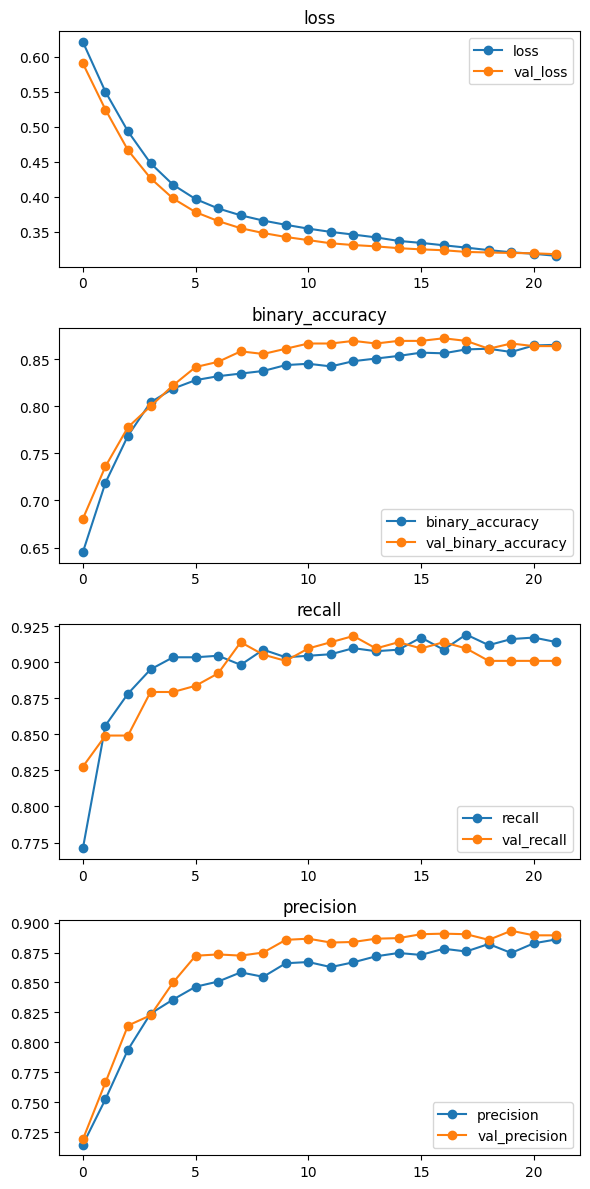

In [10]:
# plot learning
plot_history(history);

In [11]:
# make predictions
y_pred_test = model1.predict(X_test_tf)
# round the predictions
y_pred_test = np.round(y_pred_test)

19/19 [==============================] - 0s 4ms/step


In [12]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):

    # Get the classification report
    report = classification_report(y_true, y_pred)
    ## Print header and report
    header = "-"*70
    print(header, f" Classification Metrics: {label}", header, sep='\n')
    print(report)

    ## CONFUSION MATRICES SUBPLOTS
    fig, axes = plt.subplots(ncols=2, figsize=figsize)

    # create a confusion matrix  of raw counts
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', values_format="d", colorbar=colorbar,
                ax = axes[0],);
    axes[0].set_title("Raw Counts")

    # create a confusion matrix with the test data
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, values_format=".2f", colorbar=colorbar,
                ax = axes[1]);
    axes[1].set_title("Normalized Confusion Matrix")

    # Adjust layout and show figure
    fig.tight_layout()
    plt.show()

    # Return dictionary of classification_report
    if output_dict==True:
        report_dict = classification_report(y_true, y_pred, output_dict=True)
        return report_dict

----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       206
           1       0.88      0.87      0.88       395

    accuracy                           0.84       601
   macro avg       0.82      0.82      0.82       601
weighted avg       0.84      0.84      0.84       601



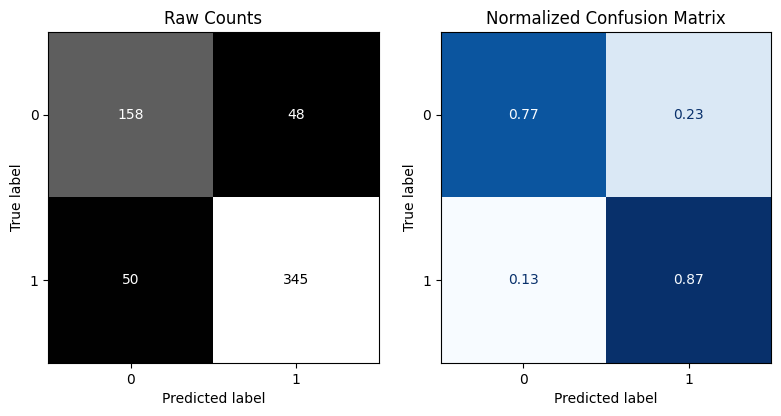

In [13]:
classification_metrics(y_test_enc, y_pred_test, label='Test Data')

# The model can be made complex with more layers for better prediction

In [14]:
keras.backend.clear_session()
from keras import regularizers
def build_model():
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =X_train_tf.shape[1],
                activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(15, activation = 'relu'))
    model.add(Dense(20, activation = 'tanh', activity_regularizer=regularizers.l1(0.01)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
                  metrics=[metrics.BinaryAccuracy(), metrics.Recall(), metrics.Precision()])
    return model

# Call our build function to build model
model2 = build_model()

# Get model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                250       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 15)                165       
                                                                 
 dense_4 (Dense)             (None, 20)                320       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 10)                1

Epoch 1/50
45/45 [==============================] - 4s 18ms/step - loss: 0.7763 - binary_accuracy: 0.6750 - recall: 0.9989 - precision: 0.6707 - val_loss: 0.7390 - val_binary_accuracy: 0.7000 - val_recall: 0.9784 - val_precision: 0.6879
Epoch 2/50
45/45 [==============================] - 0s 5ms/step - loss: 0.6853 - binary_accuracy: 0.7368 - recall: 0.9443 - precision: 0.7339 - val_loss: 0.6027 - val_binary_accuracy: 0.7944 - val_recall: 0.9224 - val_precision: 0.7926
Epoch 3/50
45/45 [==============================] - 0s 3ms/step - loss: 0.5742 - binary_accuracy: 0.7806 - recall: 0.8718 - precision: 0.8105 - val_loss: 0.5284 - val_binary_accuracy: 0.8139 - val_recall: 0.8966 - val_precision: 0.8287
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 0.5177 - binary_accuracy: 0.8083 - recall: 0.8708 - precision: 0.8442 - val_loss: 0.4847 - val_binary_accuracy: 0.8111 - val_recall: 0.8491 - val_precision: 0.8565
Epoch 5/50
45/45 [==============================] - 0s 

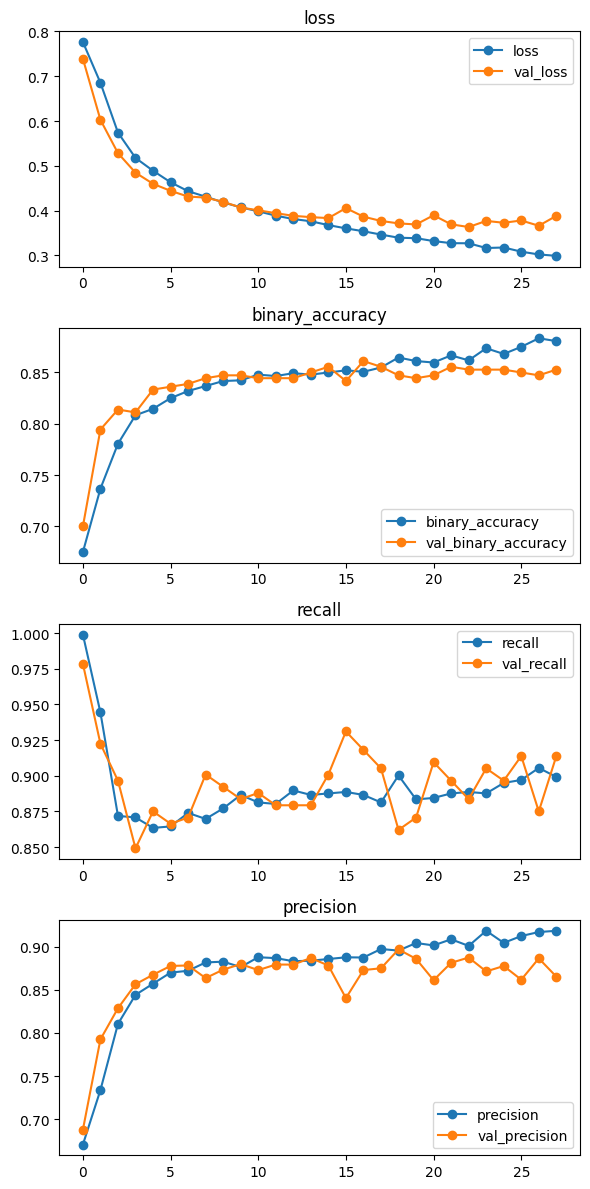

In [15]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model2.fit(X_train_tf, y_train_enc,
                        validation_split = 0.2,
                        epochs=50,
                        callbacks = [early_stop])
plot_history(history);

# Use Keras Tuner for fine tuning

In [16]:
keras.backend.clear_session()
# !pip install keras_tuner
import keras_tuner as kt
from keras_tuner import HyperParameters as hp

def build_model(hp):
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =X_train_tf.shape[1],
                activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(15, activation = 'relu'))
    # Try different values for units
    model.add(Dense(units=hp.Int('units', min_value=10, max_value=30, step=5), activation='tanh'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(20, activation = 'relu'))
    # Try different values for dropout rate
    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.4, step=0.1)))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  metrics=['accuracy', metrics.Recall(), metrics.Precision()])
    return model

In [17]:
# Make a folder to store results of hyperparameter tuning
import os
folder = '/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week19/Data/KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [22]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning')

In [23]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)
history = tuner.search(X_train_tf, y_train_enc,
                        validation_split = 0.2,
                        callbacks = [early_stop])

Trial 90 Complete [00h 00m 20s]
val_accuracy: 0.8694444298744202

Best val_accuracy So Far: 0.8777777552604675
Total elapsed time: 00h 10m 04s


In [24]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 15,
 'dropout_value': 0.2,
 'optimizer': 'rmsprop',
 'tuner/epochs': 17,
 'tuner/initial_epoch': 6,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0055'}

19/19 [==============================] - 0s 2ms/step
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       206
           1       0.86      0.85      0.85       395

    accuracy                           0.81       601
   macro avg       0.79      0.79      0.79       601
weighted avg       0.81      0.81      0.81       601



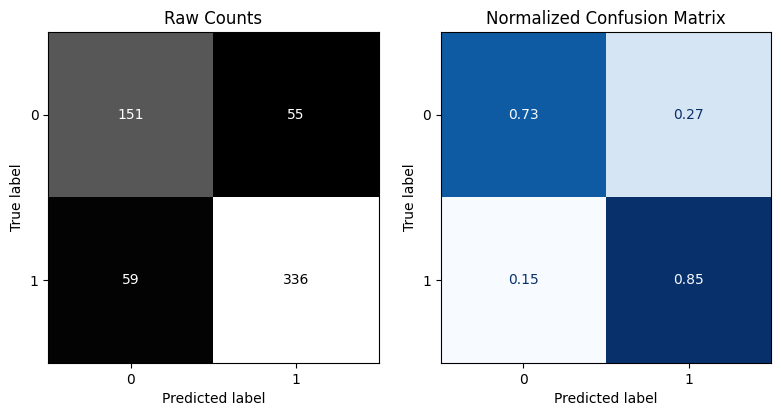

In [25]:
# Obtain best model
best_model = tuner.get_best_models()[0]
# Evaluate neural network with tuned optimizer, units, and dropout
y_pred_test = best_model.predict(X_test_tf)
# round the predictions
y_pred_test = np.round(y_pred_test)
classification_metrics(y_test_enc, y_pred_test, label='Test Data')

In [58]:
keras.backend.clear_session()
def build_model(hp):
    # Instantiate Model
    model = Sequential()

    # First hidden layer
    model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim =X_train_tf.shape[1],
                activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dropout(hp.Float(name="dropout_value1", min_value=0.8, max_value=1, step=0.1)))
    model.add(Dense(15, activation = 'relu'))
    # Try different values for units
    model.add(Dense(units=hp.Int('units', min_value=20, max_value=30, step=5), activation=hp.Choice('activation',['tanh','relu'])))
    # Try different values for dropout rate
    model.add(Dropout(hp.Float(name="dropout_value2", min_value=0.1, max_value=0.6, step=0.1)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile Model
    model.compile(loss = 'bce', optimizer='rmsprop',
                  metrics=['accuracy', metrics.Recall(), metrics.Precision()])
    return model

In [59]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=80,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuningg')

In [60]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = tuner.search(X_train_tf, y_train_enc,
                        validation_split = 0.2,
                        callbacks = [early_stop])

Trial 88 Complete [00h 00m 30s]
val_accuracy: 0.8166666626930237

Best val_accuracy So Far: 0.8666666746139526
Total elapsed time: 00h 14m 35s


19/19 [==============================] - 0s 2ms/step
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       206
           1       0.86      0.89      0.88       395

    accuracy                           0.83       601
   macro avg       0.82      0.81      0.81       601
weighted avg       0.83      0.83      0.83       601



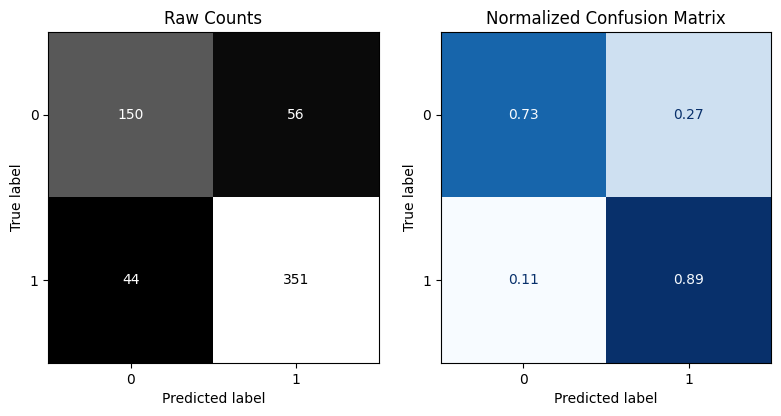

In [61]:
# Obtain best model
best_model = tuner.get_best_models()[0]
# Evaluate neural network with tuned optimizer, units, and dropout
y_pred_test = best_model.predict(X_test_tf)
# round the predictions
y_pred_test = np.round(y_pred_test)
classification_metrics(y_test_enc, y_pred_test, label='Test Data')

In [62]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'dropout_value1': 0.8,
 'units': 20,
 'activation': 'tanh',
 'dropout_value2': 0.30000000000000004,
 'tuner/epochs': 80,
 'tuner/initial_epoch': 27,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0069'}

# So far, the best model is the one with only 1 hidden layer. Further tuning will be needed.